In [5]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#reading the data from csv file
data_fr = pd.read_csv("the_office_lines_scripts.csv")
print(data_fr['speaker'].unique())

['Michael' 'Jim' 'Pam' 'Dwight' 'Jan' 'Michel' 'Todd Packer' 'Phyllis'
 'Stanley' 'Oscar' 'Angela' 'Kevin' 'Ryan' 'Man' 'Roy'
 'Documentary Crew Member' 'Mr. Brown' 'Toby' 'Kelly' 'Meredith'
 'Travel Agent' 'Man on Phone' 'Everybody' 'Lonny' 'Darryl' 'Teammates'
 'Michael and Dwight' 'Warehouse worker' 'Madge' 'Worker' 'Packer'
 'Warehouse Worker' 'Katy' 'Guy at bar' 'Other Guy at Bar' 'Guy At Bar'
 'Pam and Jim' 'Employee' "Chili's Employee" 'Waitress' 'Manager'
 "Kevin's computer" 'Warehouse Guy' 'Warehouse guy' 'Warehouse guys'
 'Video' 'Man in Video' 'Actor' 'Redheaded Actress' "Mr. O'Malley"
 'Albiny' "Pam's Mom" 'Carol' 'Bill' 'Everyone' 'Crowd' 'song' 'Song'
 'Dwight and Michael' 'Sherri' 'Creed' 'Devon' 'Children' 'Kid'
 'Vance Refrigeration Worker #1' 'Vance Refrigeration Worker #2'
 'Hank the Security Guard' 'Ira' "Ryan's Voicemail" 'Master' 'Alyssa'
 'Christian' 'Hostess' 'Michael and Christian' 'Sadiq (IT guy)' 'Mark'
 'Improv Teacher' 'Mary-Beth' 'Girl acting Pregnant' 'Ac

**Question 1 :How many characters are there? What are their names?**
>Meanwhile performing the first unique selection by 'speaker' column in our data set, the amound of 793 unique fields for speakers although in my futher report I have decided to do filter the data frame and consider as characters only speakers with more than 100 lines, in order to avoid cases like 'Angela & Oscar' or some redundant data like in the image:
![](../Screenshot 2022-08-01 130254.png)

In [25]:
lines_per_character = data_fr.value_counts('speaker').to_frame()
lines_per_character.columns = ['nr_lines']
proper_char = lines_per_character.query("nr_lines >= 100")
character_names = list(proper_char.index)
print('There are', len(character_names), 'regular characters')
print('These are their names', character_names)

There are 31 regular characters
These are their names ['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Kevin', 'Angela', 'Oscar', 'Erin', 'Ryan', 'Darryl', 'Phyllis', 'Kelly', 'Jan', 'Toby', 'Stanley', 'Meredith', 'Holly', 'Nellie', 'Creed', 'Gabe', 'Robert', 'David', 'Karen', 'Clark', 'Roy', 'Charles', 'Pete', 'Jo', 'Deangelo', 'David Wallace']


**Question 2:  For each character, find out who has the most lines across all episodes**

The character with the most line is Michael
The amount of line per characters is:                nr_lines
speaker                
Michael           12140
Dwight             7531
Jim                6816
Pam                5376
Andy               3968
Kevin              1708
Angela             1695
Oscar              1490
Erin               1469
Ryan               1379
Darryl             1243
Phyllis            1071
Kelly               956
Jan                 949
Toby                936
Stanley             761
Meredith            645
Holly               608
Nellie              529
Creed               456
Gabe                436
Robert              430
David               382
Karen               341
Clark               260
Roy                 255
Charles             221
Pete                213
Jo                  194
Deangelo            171
David Wallace       108


<AxesSubplot:>

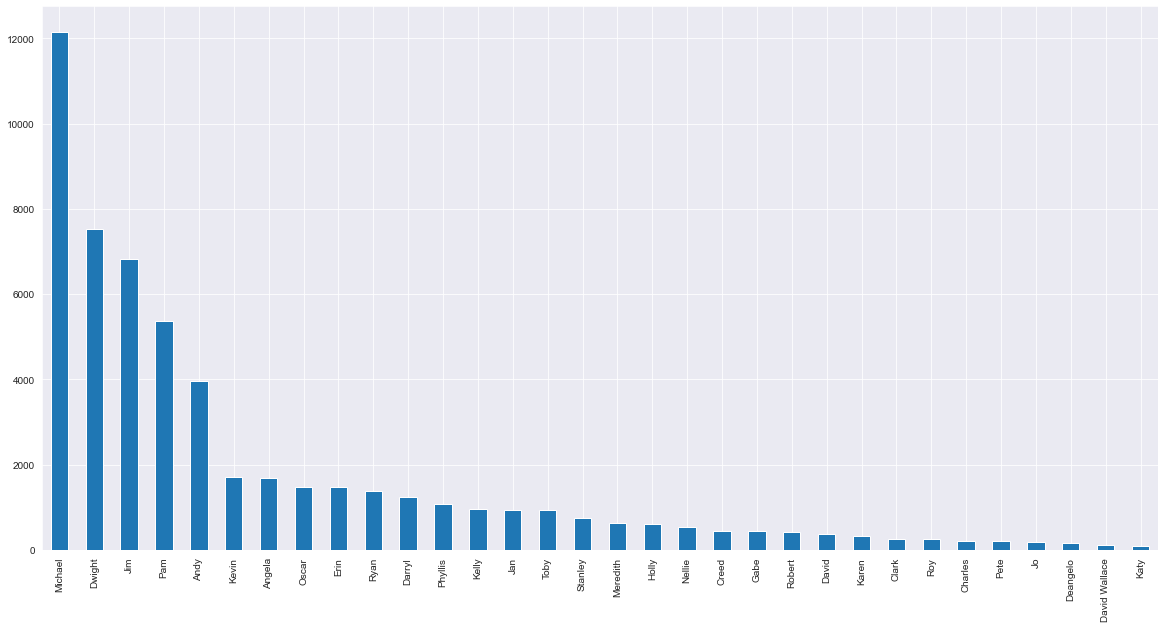

In [15]:
print('The character with the most line is', proper_char.index[0])
print('The amount of line per characters is:', proper_char)
data_fr['speaker'].value_counts().head(31).plot(kind='bar', figsize=(20,10))

**Question 3: What is the average of words per line for each character?**

             name  average_words_per_line
0         Michael               15.034349
1          Dwight               12.310317
2             Jim                9.971244
3             Pam                9.567336
4            Andy               12.858367
5           Kevin                9.028689
6          Angela                9.439528
7           Oscar                9.458389
8            Erin                9.842069
9            Ryan               10.480783
10         Darryl                9.939662
11        Phyllis                8.467787
12          Kelly               11.564854
13            Jan               10.553214
14           Toby               10.544872
15        Stanley                9.178712
16       Meredith                8.806202
17          Holly                9.011513
18         Nellie               13.591682
19          Creed               11.118421
20           Gabe               14.651376
21         Robert               14.646512
22          David               11

[Text(0, 0, 'Michael'),
 Text(1, 0, 'Dwight'),
 Text(2, 0, 'Jim'),
 Text(3, 0, 'Pam'),
 Text(4, 0, 'Andy'),
 Text(5, 0, 'Kevin'),
 Text(6, 0, 'Angela'),
 Text(7, 0, 'Oscar'),
 Text(8, 0, 'Erin'),
 Text(9, 0, 'Ryan'),
 Text(10, 0, 'Darryl'),
 Text(11, 0, 'Phyllis'),
 Text(12, 0, 'Kelly'),
 Text(13, 0, 'Jan'),
 Text(14, 0, 'Toby'),
 Text(15, 0, 'Stanley'),
 Text(16, 0, 'Meredith'),
 Text(17, 0, 'Holly'),
 Text(18, 0, 'Nellie'),
 Text(19, 0, 'Creed'),
 Text(20, 0, 'Gabe'),
 Text(21, 0, 'Robert'),
 Text(22, 0, 'David'),
 Text(23, 0, 'Karen'),
 Text(24, 0, 'Clark'),
 Text(25, 0, 'Roy'),
 Text(26, 0, 'Charles'),
 Text(27, 0, 'Pete'),
 Text(28, 0, 'Jo'),
 Text(29, 0, 'Deangelo'),
 Text(30, 0, 'David Wallace')]

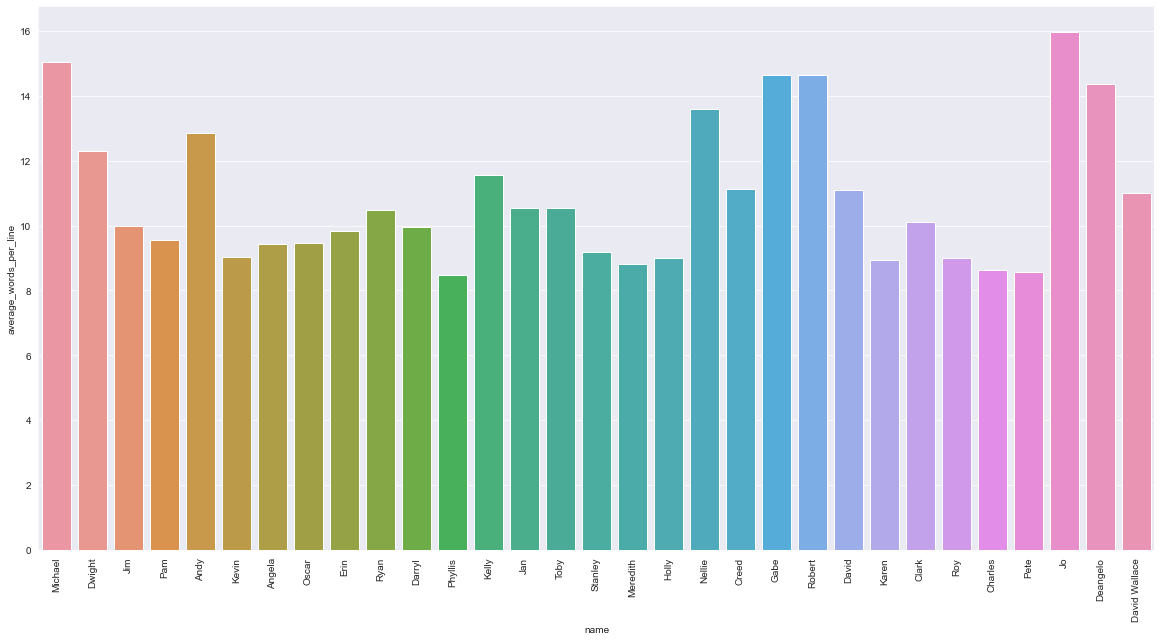

In [19]:
pd.options.mode.chained_assignment = None  # default='warn'
df = data_fr.loc[data_fr['speaker'].isin(character_names)]

df['words'] = df.apply(lambda row: len(row['line_text'].split(" ")), axis=1)

speakers_df = pd.DataFrame({'name':character_names})

def calculateAvg(nameOfSpeaker):
    tmp = df.loc[df['speaker'] == nameOfSpeaker]
    average = tmp["words"].mean()
    return average
speakers_df['average_words_per_line'] = speakers_df.apply(lambda row: calculateAvg(row['name']),axis=1)
print(speakers_df.head(31))
fig_dims = (20, 10)
ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(data=speakers_df,x=characters, y='average_words_per_line')
ax.set_xticklabels(characters, rotation = 90)

**Question 4: What is the most common word per character?**

In [ ]:
df_copy = df.copy(True)
df_copy.drop(['id', 'season','episode', 'scene', 'deleted','words'], axis=1, inplace=True)
df_copy['line_text'] = df_copy.groupby(['speaker'])['line_text'].transform(lambda x : ' '.join(x))
df_copy = df_copy.drop_duplicates().reset_index(drop=True)
#print(df_copy.head())

In [31]:
def clean_string(word):
    to_lower = word.lower()
    regex = re.compile('[^a-zA-Z]')
    return regex.sub('',to_lower)

def most_common_word(list_of_words):
    list_df = pd.DataFrame({'word': list_of_words})
    return list_df.mode()
df_copy['list_of_words'] = df_copy['line_text'].transform(lambda  x: list(map(lambda it: clean_string(it), x.split(' '))))
df_copy['most_common'] = df_copy.apply(lambda row: most_common_word(row['list_of_words']), axis=1)
speaker_common_word = df_copy.copy(True)
speaker_common_word.drop(['list_of_words', 'line_text'], axis=1, inplace=True)
print(speaker_common_word.head(31))

          speaker    most_common
0         Michael    word
0    i
1             Jim    word
0  you
2             Pam    word
0    i
3          Dwight    word
0  the
4             Jan    word
0  you
5         Phyllis    word
0    i
6         Stanley    word
0    i
7           Oscar    word
0  you
8          Angela    word
0    i
9           Kevin    word
0    i
10           Ryan    word
0  you
11            Roy    word
0  you
12           Toby    word
0    i
13          Kelly    word
0    i
14       Meredith    word
0    i
15         Darryl    word
0  you
16          Creed    word
0    i
17          David    word
0  you
18           Andy    word
0    i
19          Karen    word
0  you
20  David Wallace    word
0   to
21          Holly    word
0    i
22           Pete    word
0   to
23        Charles    word
0  you
24           Erin    word
0    i
25           Gabe    word
0    i
26             Jo    word
0  you
27          Clark    word
0  you
28         Robert    word
0  the
29       D